In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import data

In [2]:
df = pd.read_csv('google-quest-challenge/train.csv', index_col=0)

In [3]:
df.head().T

qa_id,0,1,2,3,5
question_title,What am I losing when using extension tubes in...,What is the distinction between a city and a s...,Maximum protusion length for through-hole comp...,Can an affidavit be used in Beit Din?,How do you make a binary image in Photoshop?
question_body,After playing around with macro photography on...,I am trying to understand what kinds of places...,I'm working on a PCB that has through-hole com...,"An affidavit, from what i understand, is basic...",I am trying to make a binary image. I want mor...
question_user_name,ysap,russellpierce,Joe Baker,Scimonster,leigero
question_user_page,https://photo.stackexchange.com/users/1024,https://rpg.stackexchange.com/users/8774,https://electronics.stackexchange.com/users/10157,https://judaism.stackexchange.com/users/5151,https://graphicdesign.stackexchange.com/users/...
answer,"I just got extension tubes, so here's the skin...",It might be helpful to look into the definitio...,Do you even need grooves? We make several pro...,"Sending an ""affidavit"" it is a dispute between...",Check out Image Trace in Adobe Illustrator. \n...
answer_user_name,rfusca,Erik Schmidt,Dwayne Reid,Y e z,q2ra
answer_user_page,https://photo.stackexchange.com/users/1917,https://rpg.stackexchange.com/users/1871,https://electronics.stackexchange.com/users/64754,https://judaism.stackexchange.com/users/4794,https://graphicdesign.stackexchange.com/users/...
url,http://photo.stackexchange.com/questions/9169/...,http://rpg.stackexchange.com/questions/47820/w...,http://electronics.stackexchange.com/questions...,http://judaism.stackexchange.com/questions/551...,http://graphicdesign.stackexchange.com/questio...
category,LIFE_ARTS,CULTURE,SCIENCE,CULTURE,LIFE_ARTS
host,photo.stackexchange.com,rpg.stackexchange.com,electronics.stackexchange.com,judaism.stackexchange.com,graphicdesign.stackexchange.com


In [4]:
df.columns

Index(['question_title', 'question_body', 'question_user_name',
       'question_user_page', 'answer', 'answer_user_name', 'answer_user_page',
       'url', 'category', 'host', 'question_asker_intent_understanding',
       'question_body_critical', 'question_conversational',
       'question_expect_short_answer', 'question_fact_seeking',
       'question_has_commonly_accepted_answer',
       'question_interestingness_others', 'question_interestingness_self',
       'question_multi_intent', 'question_not_really_a_question',
       'question_opinion_seeking', 'question_type_choice',
       'question_type_compare', 'question_type_consequence',
       'question_type_definition', 'question_type_entity',
       'question_type_instructions', 'question_type_procedure',
       'question_type_reason_explanation', 'question_type_spelling',
       'question_well_written', 'answer_helpful',
       'answer_level_of_information', 'answer_plausible', 'answer_relevance',
       'answer_satisfaction', '

In [9]:
# df['question_body'][0]

In [6]:
# df['answer_satisfaction'].value_counts()

## View the features (question_body)

In [10]:
import nltk.data
from nltk.util import bigrams 
from nltk.tokenize import TreebankWordTokenizer
sentence_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
treebank_tokenizer = TreebankWordTokenizer()

In [11]:
question_all = df['question_body']
# answer = df['answer']

In [12]:
# !pip install wordcloud

In [13]:
from wordcloud import WordCloud

In [14]:
def plot_wordcloud(text, ax, title=None):
    wordcloud = WordCloud(max_font_size=None, background_color='white',
                          width=800, height=800).generate(text)
    ax.imshow(wordcloud)
    if title is not None:
        ax.set_title(title)
    ax.axis("off")

In [15]:
text_q = ' '.join(question_all.values)
# text_a = ' '.join(answer.values)

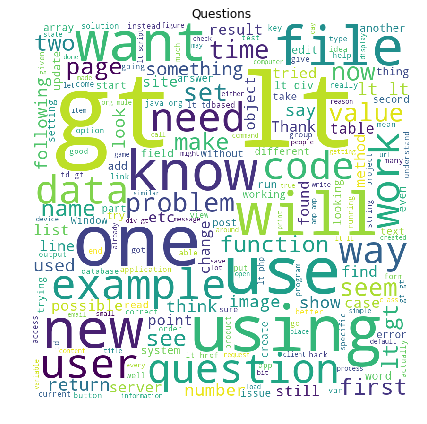

In [17]:
# Most frequent words by worldcloud
fig, axs = plt.subplots(1, 1, figsize=(6, 6))
plot_wordcloud(text_q, axs, 'Questions')
# plot_wordcloud(text_a, axs[1], 'Answers')
plt.tight_layout()
plt.show()

### Remove repeated questions

In [18]:
question = question_all.value_counts().reset_index()['index']
question.head()

0    Which is the best introductory textbook for Ba...
1    I just started a diploma in software developme...
2    What kind of non-technical training course do ...
3    When you give the player a rare but powerful i...
4    I am a graduate student in math in my final ye...
Name: index, dtype: object

In [19]:
len(question_all)

6079

In [20]:
len(question)

3583

### Tokenization

In [62]:
# What is gt, lt?
question.iloc[15]

'Is there any performance difference between using something like\n\nfor(int i = 0; i &lt; 10; i++) { ... }\n\n\nand\n\nfor(int i = 0; i &lt; 10; ++i) { ... }\n\n\nor is the compiler able to optimize in such a way that they are equally fast in the case where they are functionally equivalent?\n\nEdit:\nThis was asked because I had a discussion with a co-worker about it, not because I think its a useful optimization in any practical sense. It is largely academic. \n'

In [63]:
# Remove "&gt;" like words
def remove_html_tags(text):
    """Remove html tags from a string"""
    import re
    clean = re.compile('&.*?;')
    return re.sub(clean, '', text)

In [64]:
def tokenization(paragraph):
    paragraph = remove_html_tags(paragraph)
    punkt_sentences = sentence_tokenizer.tokenize(paragraph)
    sentences_words = [treebank_tokenizer.tokenize(sentence) for sentence in punkt_sentences]
    all_tokens = [word.lower() for sentence in sentences_words for word in sentence]
    stop_words = nltk.corpus.stopwords.words('english')
#     stop_words.extend(["would", "use"])  #add more stop words manually
    content = [w for w in all_tokens if (w.lower() not in stop_words) and w.isalpha()]  # isalpha to remove punc. and numbers
    bigrams = nltk.bigrams(content)
    return content, list(bigrams)

In [66]:
tokenization(question.iloc[15])[0]

['performance',
 'difference',
 'using',
 'something',
 'like',
 'int',
 'int',
 'compiler',
 'able',
 'optimize',
 'way',
 'equally',
 'fast',
 'case',
 'functionally',
 'equivalent',
 'edit',
 'asked',
 'discussion',
 'think',
 'useful',
 'optimization',
 'practical',
 'sense',
 'largely',
 'academic']

### Bigrams

In [67]:
all_tokens_q = []
all_bigrams_q = []
for i in range(len(question)):
    all_tokens_q.extend(tokenization(question.iloc[i])[0])
    all_bigrams_q.extend(tokenization(question.iloc[i])[1])

[('would', 1435), ('like', 1354), ('one', 1174), ('using', 1138), ('get', 1047), ('use', 993), ('new', 952), ('want', 941), ('way', 814), ('know', 809), ('x', 769), ('code', 738), ('file', 693), ('could', 663), ('need', 633), ('time', 630), ('question', 604), ('function', 604), ('set', 591), ('data', 589)]


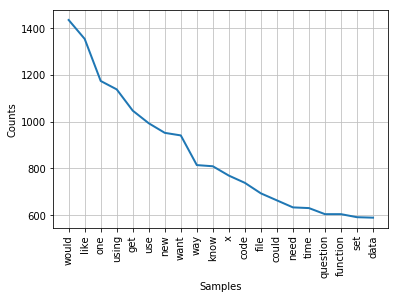

In [68]:
freq_single = nltk.FreqDist(all_tokens_q)
print(freq_single.most_common(20))
freq_single.plot(20)
plt.show()

[(('would', 'like'), 278), (('android', 'android'), 157), (('x', 'x'), 155), (('something', 'like'), 104), (('looks', 'like'), 90), (('public', 'void'), 82), (('public', 'class'), 80), (('thanks', 'advance'), 78), (('ms', 'ms'), 78), (('ca', 'find'), 74), (('error', 'query'), 65), (('x', 'p'), 63), (('please', 'help'), 61), (('like', 'know'), 60), (('p', 'x'), 60), (('hit', 'http'), 54), (('b', 'c'), 52), (('anyone', 'know'), 52), (('get', 'set'), 52), (('override', 'public'), 51)]


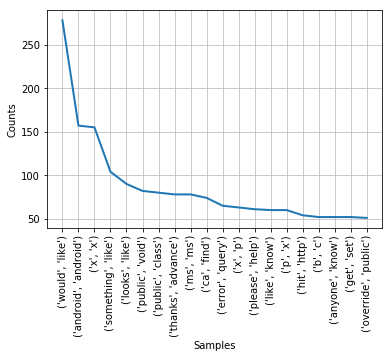

In [70]:
freq_bi = nltk.FreqDist(all_bigrams_q)
print(freq_bi.most_common(20))
freq_bi.plot(20)
plt.show()

In [32]:
# all_tokens_a = []
# all_bigrams_a = []
# for i in range(len(answer)):
#     all_tokens_a.extend(tokenization(answer.iloc[i])[0])
#     all_bigrams_a.extend(tokenization(answer.iloc[i])[1])

In [33]:
# freq_single = nltk.FreqDist(all_tokens_a)
# print(freq_single.most_common(20))
# freq_single.plot(20)
# plt.show()

## Encoding target variable (category, topic)

### Category

In [21]:
category = np.zeros((len(question)))
category_set = {'TECHNOLOGY': 0,
                'STACKOVERFLOW': 1,
                'CULTURE': 2,
                'SCIENCE': 3,
                'LIFE_ARTS': 4}
islist = question_all.value_counts() > 1
for i in range(len(question)):
    if islist[i]:
        category[i] = category_set[df.set_index('question_body').loc[question.iloc[i], 'category'].iloc[0]]
    else:
        category[i] = category_set[df.set_index('question_body').loc[question.iloc[i], 'category']]

In [22]:
category

array([3., 0., 0., ..., 3., 1., 0.])

In [84]:
df_q_category = pd.DataFrame([question, category]).T

In [91]:
df_q_category = df_q_category.rename(columns={'index': 'question', 'Unnamed 0': 'category'})
df_q_category.head()

,question,category
0,Which is the best introductory textbook for Ba...,3
1,I just started a diploma in software developme...,0
2,What kind of non-technical training course do ...,0
3,When you give the player a rare but powerful i...,0
4,I am a graduate student in math in my final ye...,4


In [95]:
q_tech = df_q_category[df_q_category['category']==0]['question']
q_sof = df_q_category[df_q_category['category']==1]['question']
q_cul = df_q_category[df_q_category['category']==2]['question']
q_sci = df_q_category[df_q_category['category']==3]['question']
q_life = df_q_category[df_q_category['category']==4]['question']

In [109]:
text_tech = ' '.join(tokenization(' '.join(q_tech.values))[0])
text_sof = ' '.join(tokenization(' '.join(q_sof.values))[0])
text_cul = ' '.join(tokenization(' '.join(q_cul.values))[0])
text_sci = ' '.join(tokenization(' '.join(q_sci.values))[0])
text_life = ' '.join(tokenization(' '.join(q_life.values))[0])

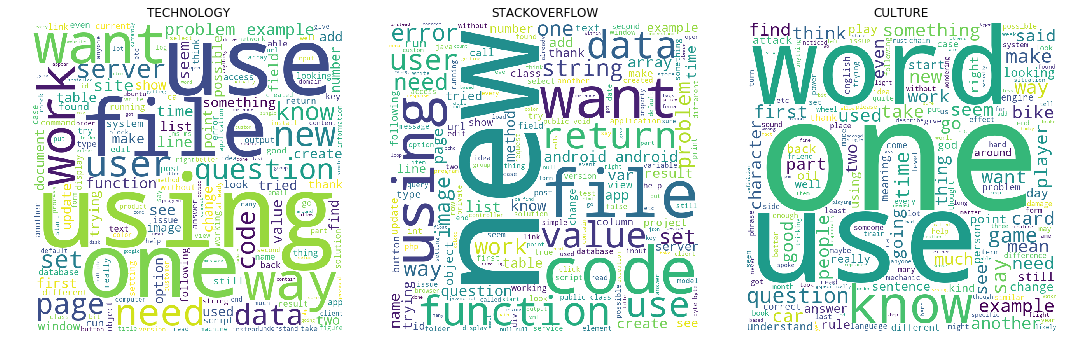

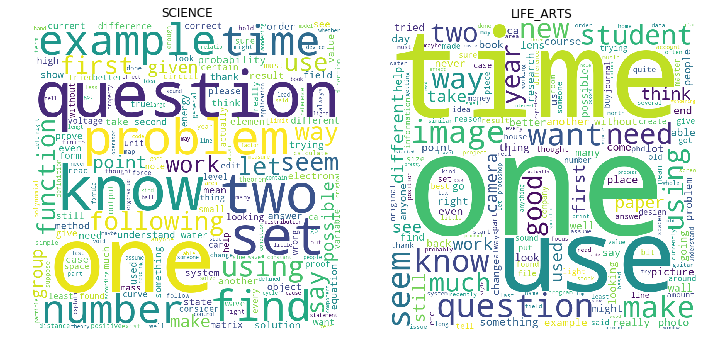

In [110]:
# Most frequent words by worldcloud

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
plot_wordcloud(text_tech, axs[0], 'TECHNOLOGY')
plot_wordcloud(text_sof, axs[1], 'STACKOVERFLOW')
plot_wordcloud(text_cul, axs[2], 'CULTURE')
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
plot_wordcloud(text_sci, axs[0], 'SCIENCE')
plot_wordcloud(text_life, axs[1], 'LIFE_ARTS')
plt.tight_layout()
plt.show()

### Topic

In [23]:
df['topic'] = df.host.apply(lambda x: x.split('.')[0])

In [24]:
df['topic'].value_counts()

stackoverflow       1253
english              229
superuser            227
electronics          221
serverfault          213
math                 187
physics              164
tex                  140
askubuntu            126
programmers          125
rpg                  123
gaming               111
unix                 108
apple                106
academia             103
photo                102
drupal                98
ux                    97
diy                   97
scifi                 96
security              92
ell                   85
gamedev               84
mathoverflow          82
wordpress             81
magento               79
mechanics             78
graphicdesign         76
money                 75
bicycles              75
travel                71
mathematica           71
gis                   69
meta                  69
boardgames            67
cooking               67
dba                   67
judaism               64
music                 63
sharepoint            62


In [27]:
topic_set = {}
for i, topic in enumerate(df['topic'].value_counts().index):
    topic_set[topic] = i

In [28]:
topic_set

{'stackoverflow': 0,
 'english': 1,
 'superuser': 2,
 'electronics': 3,
 'serverfault': 4,
 'math': 5,
 'physics': 6,
 'tex': 7,
 'askubuntu': 8,
 'programmers': 9,
 'rpg': 10,
 'gaming': 11,
 'unix': 12,
 'apple': 13,
 'academia': 14,
 'photo': 15,
 'drupal': 16,
 'ux': 17,
 'diy': 18,
 'scifi': 19,
 'security': 20,
 'ell': 21,
 'gamedev': 22,
 'mathoverflow': 23,
 'wordpress': 24,
 'magento': 25,
 'mechanics': 26,
 'graphicdesign': 27,
 'money': 28,
 'bicycles': 29,
 'travel': 30,
 'mathematica': 31,
 'gis': 32,
 'meta': 33,
 'boardgames': 34,
 'cooking': 35,
 'dba': 36,
 'judaism': 37,
 'music': 38,
 'sharepoint': 39,
 'christianity': 40,
 'biology': 41,
 'webmasters': 42,
 'stats': 43,
 'chemistry': 44,
 'salesforce': 45,
 'blender': 46,
 'webapps': 47,
 'codereview': 48,
 'raspberrypi': 49,
 'android': 50,
 'crypto': 51,
 'expressionengine': 52,
 'movies': 53,
 'dsp': 54,
 'anime': 55,
 'cs': 56,
 'softwarerecs': 57,
 'robotics': 58}

In [29]:
topic = np.zeros((len(question)))
for i in range(len(question)):
    if islist[i]:
        topic[i] = topic_set[df.set_index('question_body').loc[question.iloc[i], 'topic'].iloc[0]]
    else:
        topic[i] = topic_set[df.set_index('question_body').loc[question.iloc[i], 'topic']]

In [30]:
topic_filter = [True]*len(question)

In [31]:
# topic with counts>10, exclude stackoverflow
for i in range(len(topic)):
    if topic[i] == 0:
        topic_filter[i] = False
    elif topic[i] >= 56:
        topic_filter[i] = False

## Word embedding

In [111]:
## download google Word2Vec pretrained model
# os.system('wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"')

### We will use GloVe pretrained model.

In [112]:
# !pip install gensim

In [122]:
import gensim
from sklearn.manifold import TSNE

In [123]:
# create a list of lists for training in gensim
sent_q = []
for i in range(len(question)):
    sent_q.append(tokenization(question.iloc[i])[0])

In [124]:
len(sent_q)

3583

In [125]:
sent_q[0]

['best',
 'introductory',
 'textbook',
 'bayesian',
 'statistics',
 'one',
 'book',
 'per',
 'answer',
 'please']

In [126]:
def tsne_plot(model, doc):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for sentence in doc:
        for word in sentence:
            if word in model.wv.vocab:
                tokens.append(model[word])
                labels.append(word)
    
    tsne_model = TSNE(n_components=2, init='random', random_state=0)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [127]:
# from gensim.scripts.glove2word2vec import glove2word2vec
# glove_input_file = './glove/glove.6B.100d.txt'
# word2vec_output_file = 'glove.6B.100d.txt.word2vec'
# glove2word2vec(glove_input_file, word2vec_output_file)

In [128]:
from gensim.models import KeyedVectors
# load the Stanford GloVe model
filename = 'glove.6B.100d.txt.word2vec'
w2v_model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [129]:
w2v_model.most_similar('apple')

[('microsoft', 0.7449405789375305),
 ('ibm', 0.6821643114089966),
 ('intel', 0.6778088212013245),
 ('software', 0.6775422096252441),
 ('dell', 0.6741442680358887),
 ('pc', 0.6678153276443481),
 ('macintosh', 0.66175377368927),
 ('iphone', 0.6595611572265625),
 ('ipod', 0.6534676551818848),
 ('hewlett', 0.6516579389572144)]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


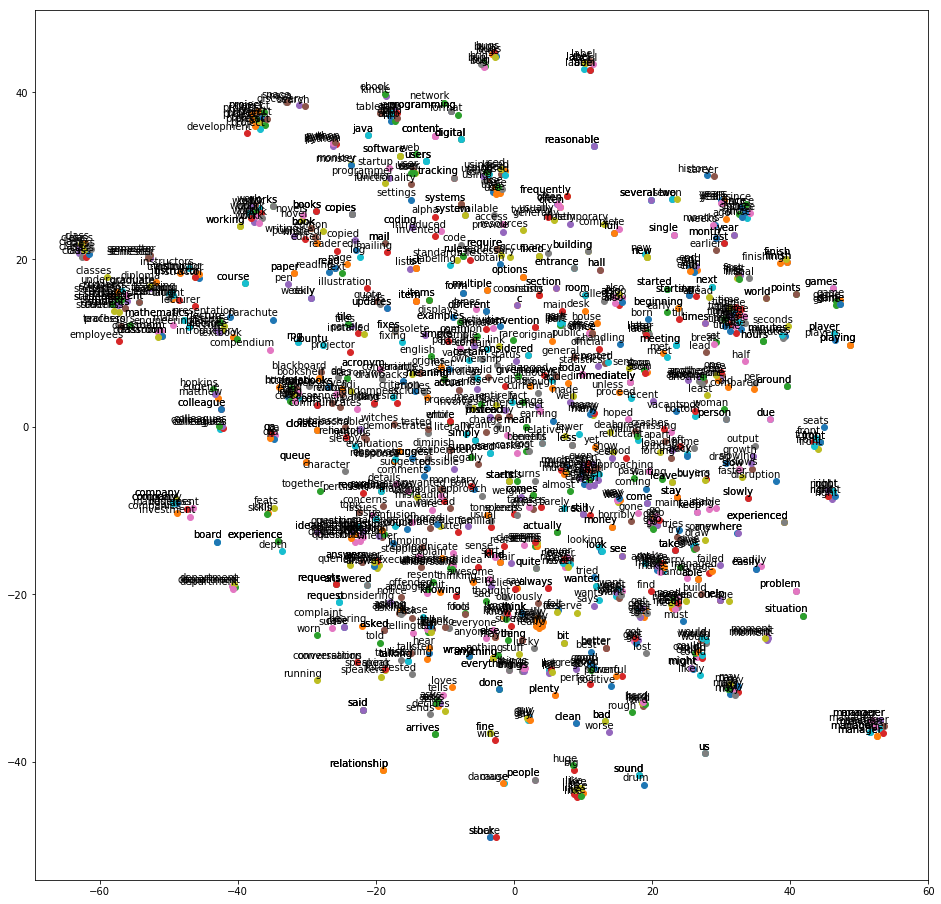

In [130]:
tsne_plot(w2v_model, sent_q[:10])

## Machine learning models

### Input matrix

In [131]:
doc_mat = np.zeros((len(sent_q), w2v_model.vector_size))
for i, row in enumerate(sent_q):
    sentence_vec = np.zeros((w2v_model.vector_size,))
    w_count = 0
    for w in row:
        if w in w2v_model.wv:
            sentence_vec += w2v_model.wv[w]
            w_count += 1
    
    if w_count != 0:
        doc_mat[i] = sentence_vec/w_count

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  import sys


In [132]:
category.shape

(3583,)

### Model for category classification

In [227]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv1D, Dropout, BatchNormalization, MaxPooling1D, Flatten
from sklearn.model_selection import train_test_split
from keras.callbacks.callbacks import EarlyStopping
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score

In [203]:
# For category
X_train, X_test, y_train, y_test = train_test_split(doc_mat, category, test_size=0.2, stratify=category, random_state=42)

In [204]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

### Random forest model

In [205]:
rf = RandomForestClassifier(random_state=42)

In [206]:
model_rf = rf.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [207]:
pred_rf = model_rf.predict(X_test)

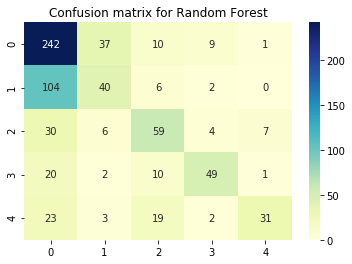

In [225]:
sns.heatmap(confusion_matrix(y_test, pred_rf), annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion matrix for Random Forest')
plt.show()

In [228]:
accuracy_score(y_test, pred_rf)

0.5871687587168759

In [214]:
precision_score(y_test, pred_rf, average='macro')

0.6233686043471246

In [215]:
recall_score(y_test, pred_rf, average='macro')

0.5248246179724769

In [216]:
f1_score(y_test, pred_rf, average='macro')

0.5513837387469416

### Naive bayes model

In [217]:
gnb = GaussianNB()

In [218]:
model_gnb = gnb.fit(X_train, y_train)

In [219]:
pred_gnb = model_gnb.predict(X_test)

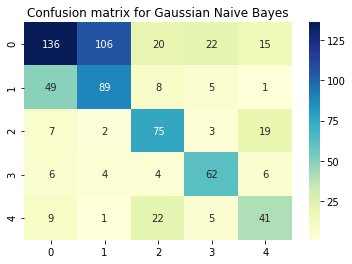

In [224]:
sns.heatmap(confusion_matrix(y_test, pred_gnb), annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion matrix for Gaussian Naive Bayes')
plt.show()

In [230]:
accuracy_score(y_test, pred_gnb)

0.5620641562064156

In [221]:
precision_score(y_test, pred_gnb, average='macro')

0.5636338993785965

In [222]:
recall_score(y_test, pred_gnb, average='macro')

0.6059323141090378

In [223]:
f1_score(y_test, pred_gnb, average='macro')

0.5767819136759421

### Neural network model

In [186]:
y_train, y_test = to_categorical(y_train, num_classes=5), to_categorical(y_test, num_classes=5)

In [187]:
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),
#     Dense(128),
#     BatchNormalization(),
#     Activation('relu'),
#     Dropout(0.3),
    Dense(64),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),
    Dense(5),
    Activation('softmax'),
])

es = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, 
                   verbose=0, mode='auto', baseline=None, restore_best_weights=True)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[es])

Train on 2866 samples, validate on 717 samples
Epoch 1/50
2866/2866 [==============================] - 1s 383us/step - loss: 1.3288 - accuracy: 0.4508 - val_loss: 1.2601 - val_accuracy: 0.4728
Epoch 2/50
2866/2866 [==============================] - 0s 121us/step - loss: 1.0495 - accuracy: 0.5645 - val_loss: 1.1478 - val_accuracy: 0.4895
Epoch 3/50
2866/2866 [==============================] - 0s 98us/step - loss: 0.9547 - accuracy: 0.5991 - val_loss: 1.0112 - val_accuracy: 0.5746
Epoch 4/50
2866/2866 [==============================] - 0s 94us/step - loss: 0.8873 - accuracy: 0.6249 - val_loss: 0.8892 - val_accuracy: 0.6192
Epoch 5/50
2866/2866 [==============================] - 0s 122us/step - loss: 0.8511 - accuracy: 0.6424 - val_loss: 0.8344 - val_accuracy: 0.6220
Epoch 6/50
2866/2866 [==============================] - 0s 122us/step - loss: 0.8035 - accuracy: 0.6689 - val_loss: 0.8046 - val_accuracy: 0.6457
Epoch 7/50
2866/2866 [==============================] - 0s 102us/step - loss: 0

In [137]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               12928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
activation_2 (Activation)    (None, 64)               

In [138]:
## Try 1D-CNN model
# model = Sequential([
#     Conv1D(filters=64, kernel_size=3, input_shape=(X_train.shape[1],1)),
#     Activation('relu'),
#     Conv1D(filters=64, kernel_size=3),
#     Activation('relu'),
#     MaxPooling1D(),
#     Flatten(),
#     Dense(128),
#     Activation('relu'),
#     Dense(5),
#     Activation('softmax'),
# ])

# es = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, 
#                    verbose=0, mode='auto', baseline=None, restore_best_weights=True)

# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# model.fit(X_train.reshape(X_train.shape+(1,)), y_train, epochs=50, validation_data=(X_test.reshape(X_test.shape+(1,)), y_test), callbacks=[es])

# pred = model.predict(X_test.reshape(X_test.shape+(1,)))

In [188]:
pred = model.predict(X_test)

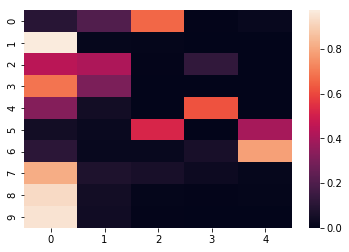

In [189]:
sns.heatmap(pred[:10])

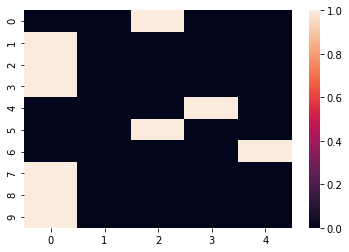

In [190]:
sns.heatmap(y_test[:10])

#### Evaluation

In [191]:
pred = np.argmax(model.predict(X_test), axis=1)

In [192]:
cm = confusion_matrix(np.argmax(y_test, axis=1), pred)
cm

array([[230,  33,  15,  10,  11],
       [ 81,  62,   5,   2,   2],
       [ 15,   0,  84,   0,   7],
       [ 10,   0,   2,  66,   4],
       [  9,   1,  18,   3,  47]])

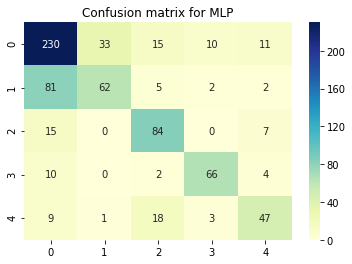

In [226]:
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion matrix for MLP')
plt.show()

In [231]:
accuracy_score(y_test, pred)

0.6820083682008368

In [195]:
precision_score(np.argmax(y_test, axis=1), pred, average='macro')

0.693341200127888

In [196]:
recall_score(np.argmax(y_test, axis=1), pred, average='macro')

0.6754040975212289

In [194]:
f1_score(np.argmax(y_test, axis=1), pred, average='macro')

0.6770817862072264

### Model for topic classfication

In [163]:
# For topic
X_train, X_test, y_train, y_test = train_test_split(doc_mat[topic_filter,:], topic[topic_filter], stratify=topic[topic_filter], test_size=0.2, random_state=42)
y_train, y_test = to_categorical(y_train, num_classes=56), to_categorical(y_test, num_classes=56)

In [165]:
model2 = Sequential([
    Dense(256, input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),
    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),
#     Dense(128),
#     BatchNormalization(),
#     Activation('relu'),
#     Dropout(0.3),
    Dense(56),
    Activation('softmax'),
])

es = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, 
                   verbose=0, mode='auto', baseline=None, restore_best_weights=True)

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model2.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[es])

Train on 2252 samples, validate on 563 samples
Epoch 1/50
2252/2252 [==============================] - 1s 470us/step - loss: 3.8556 - accuracy: 0.1048 - val_loss: 3.7796 - val_accuracy: 0.1794
Epoch 2/50
2252/2252 [==============================] - 0s 127us/step - loss: 2.9453 - accuracy: 0.2580 - val_loss: 3.5026 - val_accuracy: 0.2398
Epoch 3/50
2252/2252 [==============================] - 0s 132us/step - loss: 2.5932 - accuracy: 0.3304 - val_loss: 3.2329 - val_accuracy: 0.2575
Epoch 4/50
2252/2252 [==============================] - 0s 117us/step - loss: 2.3466 - accuracy: 0.3708 - val_loss: 2.8383 - val_accuracy: 0.3641
Epoch 5/50
2252/2252 [==============================] - 0s 125us/step - loss: 2.1594 - accuracy: 0.4232 - val_loss: 2.5326 - val_accuracy: 0.4085
Epoch 6/50
2252/2252 [==============================] - 0s 120us/step - loss: 2.0205 - accuracy: 0.4405 - val_loss: 2.2572 - val_accuracy: 0.4440
Epoch 7/50
2252/2252 [==============================] - 0s 150us/step - loss:

In [387]:
print(model2.summary())

Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_207 (Dense)            (None, 256)               25856     
_________________________________________________________________
batch_normalization_52 (Batc (None, 256)               1024      
_________________________________________________________________
activation_217 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_104 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_208 (Dense)            (None, 128)               32896     
_________________________________________________________________
batch_normalization_53 (Batc (None, 128)               512       
_________________________________________________________________
activation_218 (Activation)  (None, 128)             

In [356]:
pred = model2.predict(X_test)

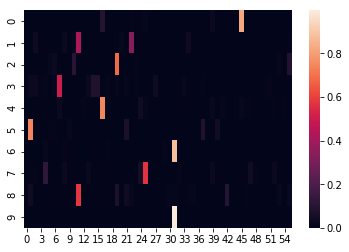

In [348]:
sns.heatmap(pred[:10])

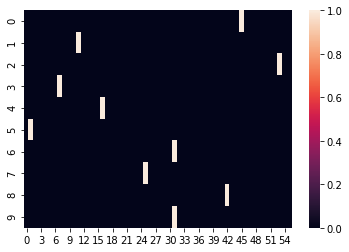

In [206]:
sns.heatmap(y_test[:10])

In [170]:
pred = np.argmax(model2.predict(X_test), axis=1)

In [171]:
cm = confusion_matrix(np.argmax(y_test, axis=1), pred)
cm

array([[16,  0,  0, ...,  0,  0,  0],
       [ 0,  8,  1, ...,  0,  0,  0],
       [ 1,  1, 16, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  1,  0,  0],
       [ 0,  0,  0, ...,  0,  4,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

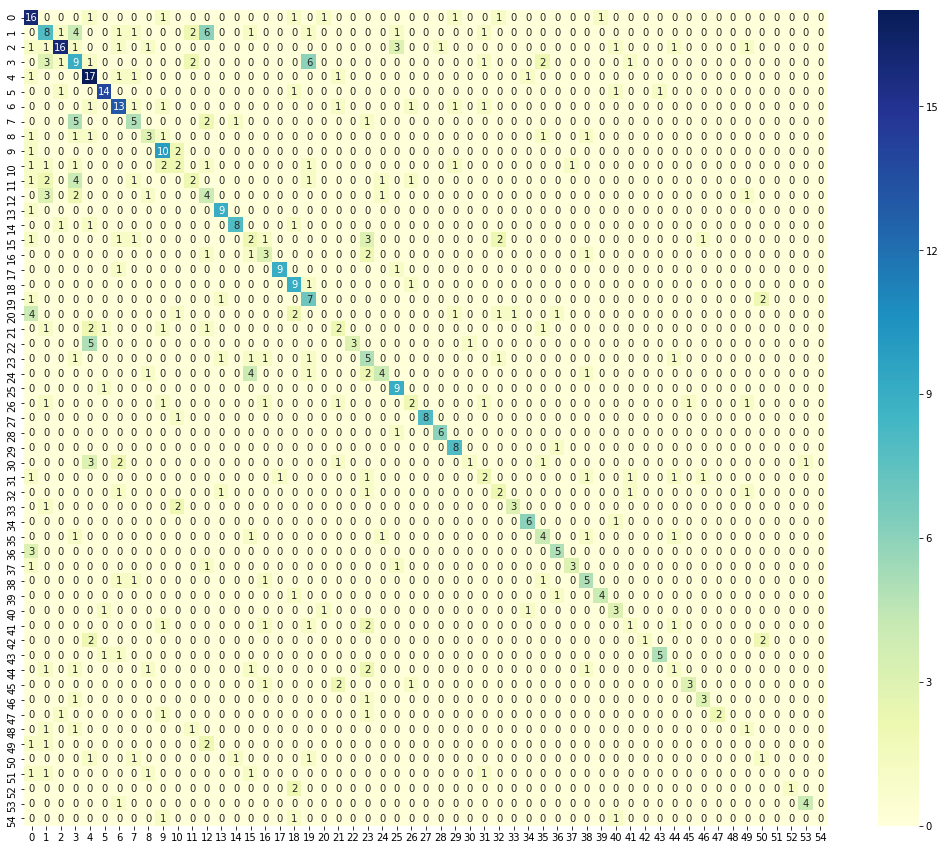

In [172]:
plt.figure(figsize=(18, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [173]:
f1_score(np.argmax(y_test, axis=1), pred, average='macro')

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.4521550568064697

In [178]:
precision_score(np.argmax(y_test, axis=1), pred, average='macro')

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.5009892102846648

In [179]:
recall_score(np.argmax(y_test, axis=1), pred, average='macro')

0.45326126150236823